In [2]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

In [3]:
ind = pd.read_csv('ind30_m_vw_rets.csv', parse_dates = True, na_values = -99.99, index_col = 0)/100
ind.index = pd.to_datetime(ind.index, format = '%Y%m').to_period('M')

In [13]:
ind.columns = [column.replace(' ','') for column in ind.columns]
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [4]:
er = erk.annualized_return(ind['1996':'2000'])
cov = ind['1996':'2000'].cov()

``` 
weights = ??
rets = [erk.portfolio_returns(w,er) for w in weights]
vol = [erk.portfolio_volitility(w,er) for w in weights]

```

In [17]:
from scipy.optimize import minimize

In [18]:
l = ['Games', 'Fin']
rets = erk.portfolio_returns(np.array([.5,.5]),er[l])
rets

0.14579149086310117

In [1]:
erk.plot_ef(20,er[l],cov.loc[l,l])

NameError: name 'erk' is not defined

In [75]:
vol15 = erk.min_volitlity(.15,er[l],cov.loc[l,l])
erk.portfolio_volitility(vol15, cov.loc[l,l])

0.056163669406706564

In [79]:
l = ['Smoke', 'Fin', 'Games', 'Coal']

-0.0535544410885449

In [93]:
def optimal_weights(n_points, er, cov):
    target_rs = np.linspace(er.min(),er.max(),n_points)
    weights = [erk.min_volitlity(target_return,er,cov) for target_return in target_rs ]
    return weights

def plot_ef(n_points, er, cov, style = '.-'):
    """
    Plots the Efficent Forntier for a given set of returns and volilities
    """
    
    weights = optimal_weights(n_points, er, cov)
    rets = [erk.portfolio_returns(w, er) for w in weights]
    vol = [erk.portfolio_volitility(w,cov) for w in weights]
    return pd.DataFrame({'Rets':rets,'Risk':vol}).plot.line(x = 'Risk', 
                                                     y = 'Rets', 
                                                     style = '.-',
                                                     title = 'Efficient Frontier for a {} asset portfolio'.format(n_points))

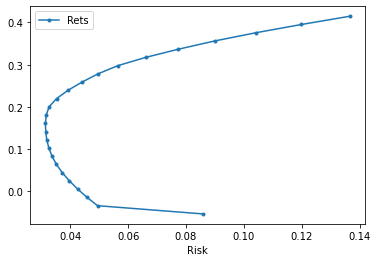

In [5]:
erk.plot_ef(25,er,cov)

In [124]:
optimal_weights = erk.optimal_weights(er.shape[0],er,cov)

In [161]:
optimal_returns = [erk.portfolio_returns(weight,er) for weight in optimal_weights]
optimal_returns = (np.array(optimal_returns) * 100).round(2)

In [162]:
min_vol = [erk.portfolio_volitility(weight,cov) for weight in optimal_weights ]
min_vol = (np.array(min_vol) * 100).round(2)

In [176]:
tab1 = pd.DataFrame(optimal_weights, columns = er.index).round(2) * 100

In [180]:
tab2 = pd.DataFrame({'Returns': optimal_returns,
             'Volitlity':min_vol})


In [206]:
rv_w = pd.concat([tab2,tab1], axis = 1)

In [210]:
rv_w.iloc[17][rv_w.iloc[17] > 0]

Returns      22.09
Volitlity     3.55
Hlth         30.00
ElcEq         5.00
Coal          7.00
Util         33.00
BusEq         8.00
Rtail        18.00
Name: 17, dtype: float64